<center><h1>DSCI-552 HW_2</h1></center>
<br>
<center><font size="4">Name: Jiade Song GitHubID: JiadeSong USCID: 9019610285 </font></center>

<center><font size="4">1. Combined Cycle Power Plant Data Set</font></center>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import abline_plot
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### (b) Exploring the data:
    # i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [2]:
DataFolds5x2_pp = pd.read_excel('../../data/hw2_data/Folds5x2_pp.ods', engine="odf")
DataFolds5x2_pp

NameError: name 'pd' is not defined

In [3]:
print('Number of rows: '+str(len(DataFolds5x2_pp)))
print('Number of columns: '+str(len(DataFolds5x2_pp.columns)))

Number of rows: 9568
Number of columns: 5


        Answer: 
        Number of rows: 9568; 
        Number of columns: 5; 
        The rows represent records of hourly average ambient variables (AT, V, AP, RH & PE); 
        The rows represent the name of the ambient variables: 
            - Temperature (AT) in the range 1.81°C and 37.11°C (independent variable)
            - Ambient Pressure (AP) in the range 992.89-1033.30 milibar (independent variable)
            - Relative Humidity (RH) in the range 25.56% to 100.16% (independent variable)
            - Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg (independent variable)
            - Net hourly electrical energy output (PE) 420.26-495.76 MW (dependent variable)
            (From: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant)

       # ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

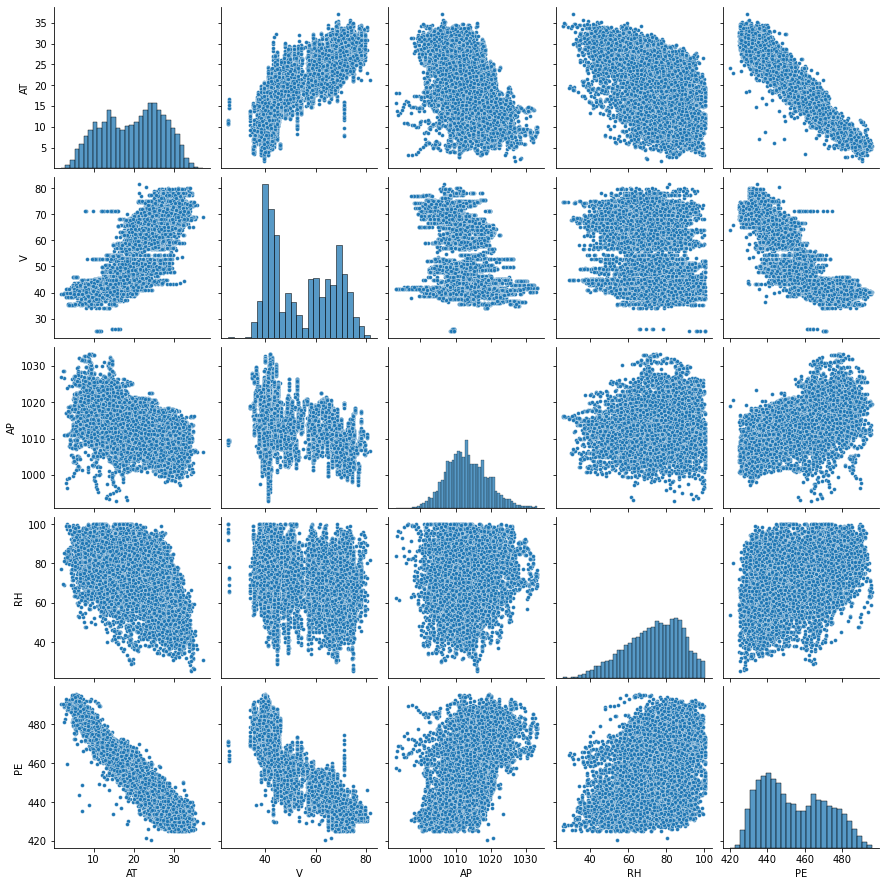

In [4]:
sns.pairplot(DataFolds5x2_pp,vars=DataFolds5x2_pp.columns[:],plot_kws={'s':15});

        Answer: 
            Independent variables vs. Dependent variables: 
            1. AT and V seems to have a very high possibility to be negative linearly correlate with PE. 
            2. AP have a weak positive relationship with PE. 
            
            Inter Independent variables:
            1. AT seems to have an obvious interaction with V. 
            2. AP seems to be a little bit negative interacted with V and AT. So as for RH and AT. 

       # iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [5]:
column_name = DataFolds5x2_pp.columns
tb = pd.DataFrame(DataFolds5x2_pp[column_name[0]].describe())
for i in column_name[1:-1]:
    tb = pd.concat([tb, pd.DataFrame(DataFolds5x2_pp[i].describe())], axis=1)
    
Summary_table = tb.rename(index={'50%':'median', '25%':'first quartile', '75%':'third quartile'});
Summary_table.loc['range'] = Summary_table.loc['max']-Summary_table.loc['min']
Summary_table.loc['interquartile range'] = Summary_table.loc['third quartile']-Summary_table.loc['first quartile']
Summary_table.loc[['mean','median','first quartile', 'third quartile','range','interquartile range']]
# tb

,AT,V,AP,RH
mean,19.651231,54.305804,1013.259078,73.308978
median,20.345000,52.080000,1012.940000,74.975000
first quartile,13.510000,41.740000,1009.100000,63.327500
third quartile,25.720000,66.540000,1017.260000,84.830000
range,35.300000,56.200000,40.410000,74.600000
interquartile range,12.210000,24.800000,8.160000,21.502500


        Answer: The info is shown in the table above.

### (c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

Feature Name: AT
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.000     496.727     497.341
AT            -2.1713      0.007   -291.715      0.000      -2.186      -2.157
Feature Name: V
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.000     517.061     518.542
V             -1.1681      0.007   -172.402      0.000      -1.181      -1.155
Feature Name: AP
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.000   -1105.167   -1005.355
AP             1.4899      0.025     59.296      0.000       1.441       1.539
Fe

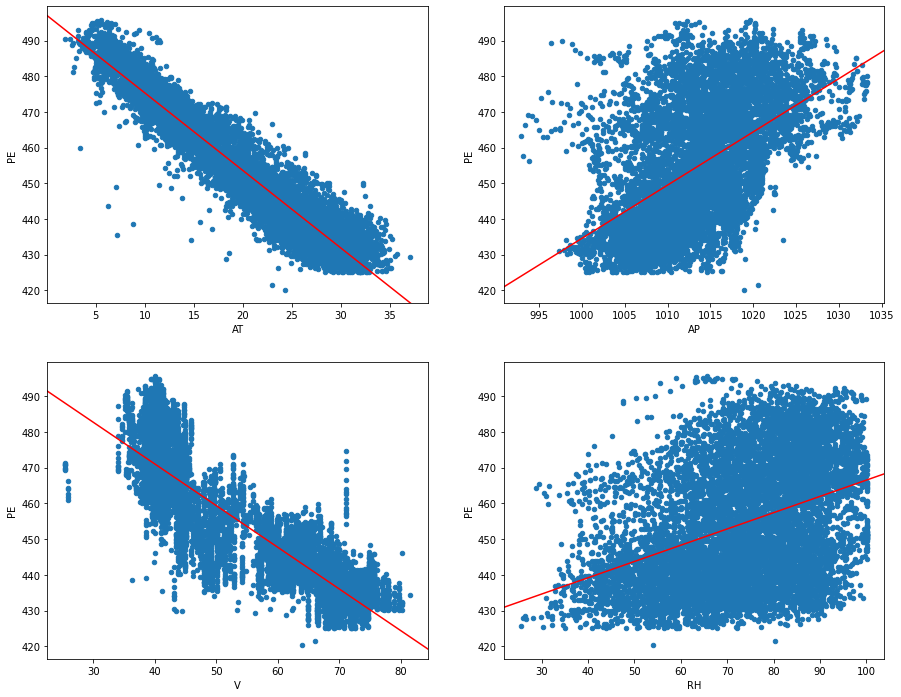

In [6]:
f, axes = plt.subplots(2, 2, figsize=(15,12))
k = 0
uni_variate = []
for i in range(2):
    for j in range(2):
        Y = DataFolds5x2_pp['PE']
        X = DataFolds5x2_pp[column_name[k]]
        X = sm.add_constant(X)
        mod = sm.OLS(Y, X)
        res = mod.fit()
        par = res.params
        uni_variate.append(par[1])
        print('Feature Name: ' + str(column_name[k]))
        print(res.summary().tables[1])
        DataFolds5x2_pp.plot(x=column_name[k], ax=axes[j,i], y='PE', kind='scatter');
        abline_plot(model_results=res, ax=axes[j,i], color = 'red');
        k = k+1 


        Answer:
            Linear regression models are:
                PE = 497.0341 - 2.1713 * AT
                PE = 517.8015 - 1.1681 * V
                PE = -1055.2610 + 1.4899 * AP
                PE = 420.9618 + 0.4557 * RH
                All of the coefficient are statistically significant associate between the 
                predictor and the response. (p-value = 0, reject the null)
                
            There should be no outliers to remove. 

### (d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 :βj =0?

In [7]:
mmod = sm.OLS(DataFolds5x2_pp['PE'], sm.add_constant(DataFolds5x2_pp[column_name[:-1]]))
mres = mmod.fit()
print(mres.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:02:56   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

        Answer: 
            The linear regression model is:
            PE = 454.6093 - 1.9775 * AT - 0.2339 * V + 0.0621 * AP - 0.1581 * RH
            All the p-value are 0. 
            For all predictors, we can reject the null hypothesis H0 :βj =0. 

### (e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

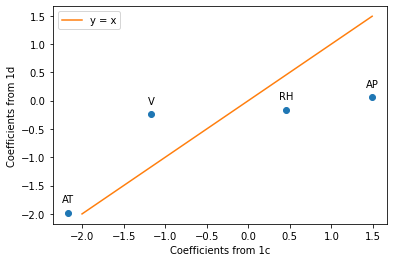

In [8]:
m_par = mres.params
plt.plot(uni_variate,m_par[1:],linestyle="",marker="o")

k = 0
for i,j in zip(uni_variate,m_par[1:]):
    label = str(column_name[k])
    k += 1
    plt.annotate(label, (i,j), textcoords="offset points", xytext=(0,10), ha='center') 
    plt.xlabel('Coefficients from 1c')
    plt.ylabel('Coefficients from 1d')
plt.plot(np.arange(-2, 1.5, 0.01),np.arange(-2, 1.5, 0.01), label = 'y = x')
plt.legend();

        Answer:
            If put all variables in a single linear regression model (1d), the coefficient of V is higher than 1c and the coefficients of RH and AP is lower than 1c. 

### (f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form
###                                                  Y = β0 + β1X + β2X^2 + β3X^3 + ε

Feature Name: AT
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.000     491.409     494.047
x1            -0.6103      0.124     -4.941      0.000      -0.852      -0.368
x2            -0.1251      0.007    -18.199      0.000      -0.139      -0.112
x3             0.0027      0.000     22.594      0.000       0.002       0.003
Feature Name: V
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.000     536.209     572.084
x1            -2.1444      0.509     -4.214      0.000      -3.142      -1.147
x2            -0.0027      0.009     -0.294      0.768      -0.021       0.015
x3             0.0001   5.45e-05      2.465      0.014    2.75e-05       0.000
Feature Name: AP
  

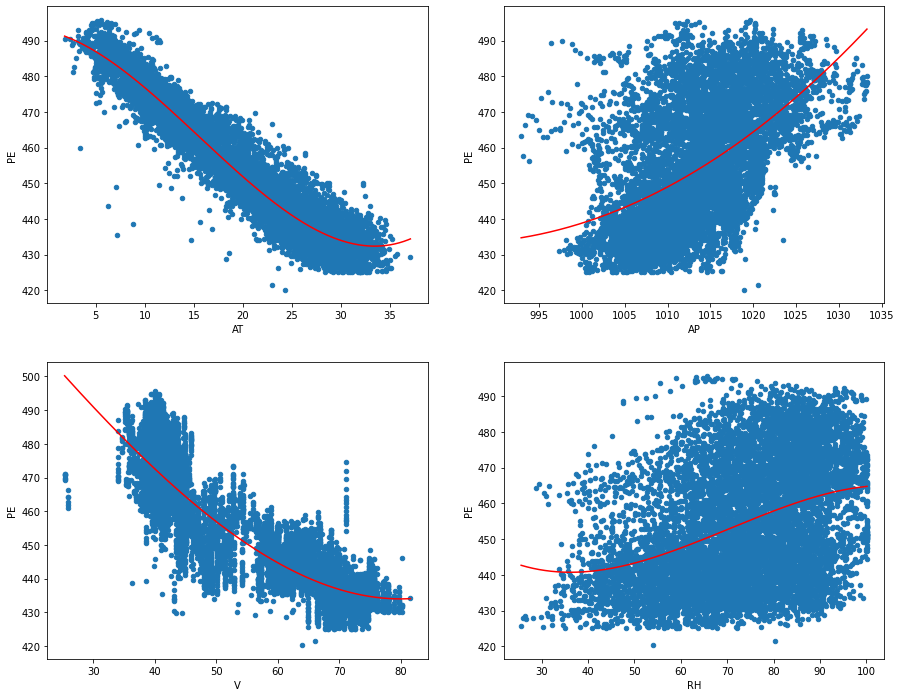

In [9]:
f, axes = plt.subplots(2, 2, figsize=(15,12))
k = 0
uni_variate = []
poly = PolynomialFeatures(degree=3)
for i in range(2):
    for j in range(2):
        print("Feature Name: "+column_name[k])
        Y = DataFolds5x2_pp['PE']
        X = DataFolds5x2_pp[column_name[k]]
        X_degree3 = poly.fit_transform(np.array(X).reshape(-1, 1))
        mod = sm.OLS(Y, X_degree3)
        res = mod.fit()
        par = res.params
        print(res.summary().tables[1])
        x_line = np.arange(min(X), max(X), 0.01)
        x_line_degree3 = poly.fit_transform(np.array(x_line).reshape(-1, 1))
#         print(par)
        Pre = res.predict(x_line_degree3)
        a = DataFolds5x2_pp.plot(x=column_name[k], y='PE',ax=axes[j,i], kind='scatter');
        a.plot(x_line, Pre, 'r')
#         abline_plot(model_results=res, ax=axes[j,i], color = 'red');
        k = k+1 

        Answer:
            For AT, AP and RH, the betas for squares and cubics are significantly not to be zero.
            (reject the null)

### (g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.


In [10]:
inter_mol = smf.ols(formula='PE ~ AT + V + AP + RH + AT:V + AT:AP + AT:RH + V:AP + V:RH \
+ AP:RH', data=DataFolds5x2_pp).fit()
summary = inter_mol.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,685.7825,78.640,8.721,0.000,531.631,839.934
AT,-4.3470,2.373,-1.832,0.067,-8.999,0.305
V,-7.6749,1.351,-5.682,0.000,-10.323,-5.027
AP,-0.1524,0.077,-1.983,0.047,-0.303,-0.002
RH,1.5709,0.773,2.031,0.042,0.055,3.087
AT:V,0.0210,0.001,23.338,0.000,0.019,0.023
AT:AP,0.0018,0.002,0.752,0.452,-0.003,0.006
AT:RH,-0.0052,0.001,-6.444,0.000,-0.007,-0.004
V:AP,0.0068,0.001,5.135,0.000,0.004,0.009
V:RH,0.0008,0.000,1.716,0.086,-0.000,0.002


        Answer: 
            The interactions of AT:V, AT:RH, V:AP and AP:RH are significant. 

### (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [11]:
full_data = DataFolds5x2_pp
full_data['AT2'] = full_data.AT ** 2
full_data['AP2'] = full_data.AP ** 2
full_data['RH2'] = full_data.RH ** 2

In [12]:
full_data_train_x, full_data_test_x, full_data_train_y, full_data_test_y = \
train_test_split(full_data.drop(['PE'], axis=1), full_data['PE'], test_size=0.3, random_state=3)
full_data_train_x['PE'] = full_data_train_y
full_model_quadratic = smf.ols(formula='PE ~ AT + V + AP + RH + AT2 + \
AP2 + RH2', data=full_data_train_x).fit()
full_data_train_pre = full_model_quadratic.predict(full_data_train_x)
summary_quadratic = full_model_quadratic.summary()
print('Quadratic model summary table: ')
print(summary_quadratic.tables[1])
full_Pre_quadratic = full_model_quadratic.predict(full_data_test_x)
print('Quadratic Model Train MSE: '+str(mean_squared_error(full_data_train_y, full_data_train_pre)))
print('Quadratic Model Test MSE: '+str(mean_squared_error(full_data_test_y, full_Pre_quadratic)))
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')


full_model_interaction = smf.ols(formula='PE ~ AT + V + RH + \
AT:V + AT:RH + V:AP + AP:RH', data=full_data_train_x).fit()
full_data_train_pre2 = full_model_interaction.predict(full_data_train_x)
summary_interaction = full_model_interaction.summary()
print('Interaction model summary table: ')
print(summary_interaction.tables[1])
full_Pre_interaction = full_model_interaction.predict(full_data_test_x)
print('Interaction Model Train MSE: '+str(mean_squared_error(full_data_train_y, full_data_train_pre2)))
print('Interaction Model Test MSE: '+str(mean_squared_error(full_data_test_y, full_Pre_interaction)))

Quadratic model summary table: 
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.121e+04   1091.043    -10.272      0.000   -1.33e+04   -9068.886
AT            -3.0403      0.040    -76.574      0.000      -3.118      -2.962
V             -0.2970      0.008    -35.104      0.000      -0.314      -0.280
AP            23.0296      2.152     10.699      0.000      18.810      27.249
RH             0.0374      0.031      1.212      0.226      -0.023       0.098
AT2            0.0316      0.001     29.706      0.000       0.030       0.034
AP2           -0.0113      0.001    -10.650      0.000      -0.013      -0.009
RH2           -0.0011      0.000     -5.007      0.000      -0.001      -0.001
Quadratic Model Train MSE: 18.34730470734943
Quadratic Model Test MSE: 18.60978342771426
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Interactio

### (i) KNN Regression:
    # i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1,2,...,100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

In [13]:
K_range = np.arange(1, 101, 1)
train_mse_set = []
test_mse_set = []
for i in K_range:
    neigh = KNeighborsRegressor(n_neighbors=i)
    knn_model = neigh.fit(full_data_train_x[['AT', 'V', 'AP', 'RH']], full_data_train_y)
    train_pred_y = knn_model.predict(full_data_train_x[['AT', 'V', 'AP', 'RH']])
    test_pred_y = knn_model.predict(full_data_test_x[['AT', 'V', 'AP', 'RH']])
    train_mse = mean_squared_error(full_data_train_y, train_pred_y)
    test_mse = mean_squared_error(full_data_test_y, test_pred_y)
    train_mse_set.append(train_mse)
    test_mse_set.append(test_mse)

The Optimal K: 4 and the Testing MSE is: 16.486638072535705. 
The Train MSE is 9.386338450052262


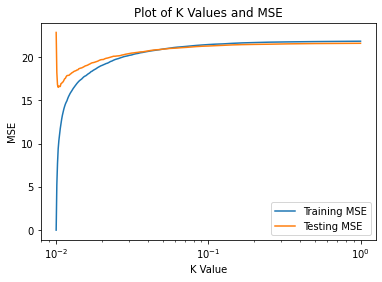

In [14]:
inv_K = 1/K_range
plt.axes(xscale = 'log')
a = plt.plot(inv_K[::-1], train_mse_set, label = 'Training MSE')
plt.plot(inv_K[::-1], test_mse_set, label = 'Testing MSE')
plt.xlabel('K Value')
plt.ylabel('MSE')
plt.title('Plot of K Values and MSE');
plt.legend();
# plt.gca().invert_xaxis()
min_index = test_mse_set.index(min(test_mse_set))
BEST_K = K_range[min_index]
optimal_train_mse = train_mse_set[min_index]
print('The Optimal K: ' + str(BEST_K) + ' and the Testing MSE is: ' + str(min(test_mse_set))+'. ')
print('The Train MSE is ' + str(optimal_train_mse))

### (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

        Answer: 
            KNN with K=4 has a Test MSE = 16.49 and Train MSE =  9.3863.
            Linear Regression Model considering interactions has a MSE=18.34. 
            So KNN has a better performance. 

### 

<center><font size="4">2. ISLR: 2.4.1</font></center>

#### 1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.
    (a) The sample size n is extremely large, and the number of predictors p is small.
    (b) The number of predictors p is extremely large, and the number of observations n is small.
    (c) The relationship between the predictors and response is highly non-linear.
    (d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.

        Answer:
            (a): Flexible is better. Because the sample size is large, if the model is more flexible, the 
                 large number of data will guarantee that the modle could not be overfitted. 
            (b): Flexible is worse. Because the sample size is small, if model is more flexible to fit the 
                 the large n of predictors, it is higher possibility to overfit. 
            (c): Flexible is better. Because the inflexible of model will make the curve nore flat, which is 
                 more close to linear but not non-linear, which means a higher possiblilty of underfitting. 
            (d): Flexible is worse. If the variance of errors are big, a more flexible model will make it more
                 possible to include the errors into the model. 

### 

<center><font size="4">3. ISLR: 2.4.7</font></center>

#### 7. The table below provides a training data set containing six observations, three predictors, and one qualitative response variable. 

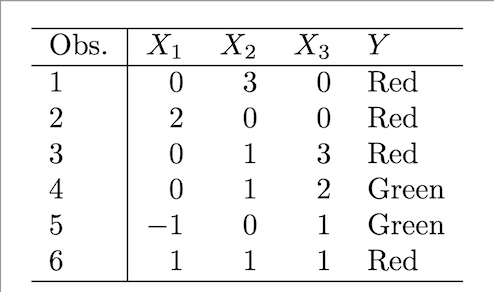
#### Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.
    (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.
    (b) What is our prediction with K = 1? Why?
    (c) What is our prediction with K = 3? Why?
    (d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?

        Answer:
            (a): d(a,b) = sqrt((a1-b1)^2+(a2-b2)^2+(a3-b3)^2)
                 d(Obs1, Test Point) = sqrt((0)^2+(3-0)^2+(0)^2) = 3
                 d(Obs2, Test Point) = sqrt((2-0)^2+(0)^2+(0)^2) = 2
                 d(Obs3, Test Point) = sqrt((1-0)^2+(3-0)^2+(0)^2) = sqrt(10)
                 d(Obs4, Test Point) = sqrt((1-0)^2+(2-0)^2+(0)^2) = sqrt(5)
                 d(Obs5, Test Point) = sqrt((1-0)^2+(-1-0)^2+(0)^2) = sqrt(2)
                 d(Obs6, Test Point) = sqrt((1-0)^2+(1-0)^2+(1-0)^2) = sqrt(3)
            (b): If just 1 nearest-neighbor, it is closest to the Obs5, with distance of sqrt(2), the category 
                 is Green
            (c): If 3 nearest-neighbors, it is closest to the Obs5, Obs6 and Obs2, the category is 
                 Red (2/3)
            (d): if the Bayws decision boundary is nonlinear, the line or boundary is very flexible, which 
                 means the selection of the nearest neighbors changes a lot when the points change. In order 
                 to be changed with such great portion, the number of nearest-neighbors should be small. 